# 1. Imports 

In [1]:
pip install ultralytics

  Using cached torch-2.9.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
  Using cached torchvision-0.24.0-cp313-cp313-win_amd64.whl.metadata (5.9 kB)
Using cached torch-2.9.0-cp313-cp313-win_amd64.whl (109.3 MB)
Using cached torchvision-0.24.0-cp313-cp313-win_amd64.whl (4.3 MB)

   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [torch]
   ---------------------------------------- 0/2 [t

In [2]:
pip install wandb

  Using cached wandb-0.22.2-py3-none-win_amd64.whl.metadata (10 kB)
Using cached wandb-0.22.2-py3-none-win_amd64.whl (19.1 MB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 470.5 kB/s eta 0:00:04
   ---------- ----------------------------- 0.5/2.0 MB 470.5 kB/s eta 0:00:04
   --------------- ------------------------ 0.8/2.0 MB 492.0 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.0 MB 492.0 kB/s eta 0:00:03
   -------------------- ------------------- 1.0/2.0 MB 515.4 kB/s eta 0:00:02
   -------------------- ------------------- 1.0/2.0 MB 515.4 kB/s eta

In [1]:
import os
import cv2
import yaml
import math
import wandb
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO

c:\Users\mmwmn\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
c:\Users\mmwmn\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may

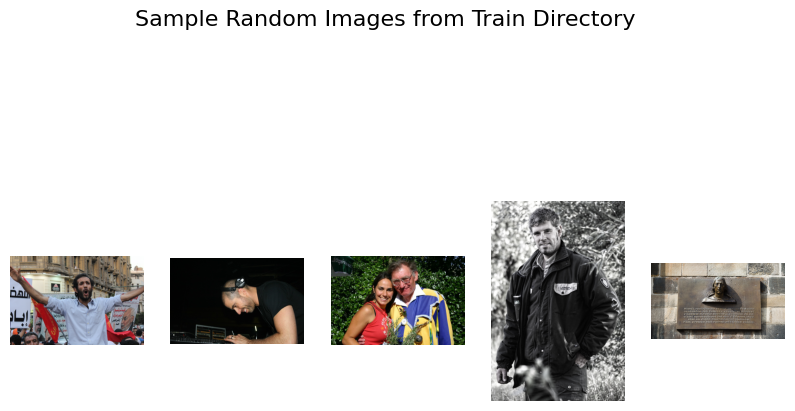

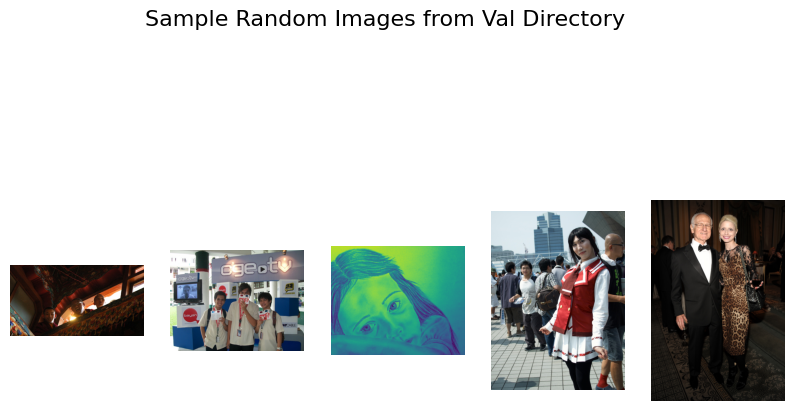

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ✅ ضع هنا المسارات الحقيقية للبيانات على جهازك
train_dir = r"E:\archive\images\train"
val_dir = r"E:\archive\images\val"

def visualize_random_images(directory, num_images=5):
    images_to_show = num_images
    fig = plt.figure(figsize=(10, 6))

    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                all_files.append(os.path.join(root, file))

    random.shuffle(all_files)

    for i in range(min(images_to_show, len(all_files))):
        img_path = all_files[i]
        img = mpimg.imread(img_path)
        plt.subplot(1, images_to_show, i + 1)
        plt.imshow(img)
        plt.axis('off')

# Train images
visualize_random_images(train_dir)
plt.suptitle('Sample Random Images from Train Directory', fontsize=16)
plt.show(block=True)

# Val images
visualize_random_images(val_dir)
plt.suptitle('Sample Random Images from Val Directory', fontsize=16)
plt.show(block=True)


# 3. Set Config file and train model

In [11]:
config_file = {
    'train':r'E:\archive\images\train',
    'train_labels':r'E:\archive\labels\train',
    'val':r'E:\archive\images\val',
    'val_labels':r'E:\archive\labels\val',
    'names':['Human Face']
}

In [14]:
import os
import yaml
save_path = r"E:\archive\face_detection_config.yaml"

os.makedirs(os.path.dirname(save_path), exist_ok=True)

with open(save_path, 'w') as file:
    yaml.dump(config_file, file, default_flow_style=False)

print(f"✅ Config file saved at: {save_path}")

✅ Config file saved at: E:\archive\face_detection_config.yaml


In [15]:
# Log in to Weights and Biases with your API key
wandb.login(key='743abff184a2764efeab329bcbae4f6889ec1cd2')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\mmwmn\_netrc
wandb: Currently logged in as: hossamrizk048 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [1]:
import torch
print(torch.cuda.is_available())


False


In [1]:
model = YOLO('yolov8n.pt')
model.train(data=r'E:\archive\face_detection_config.yaml', epochs=20)

NameError: name 'YOLO' is not defined

# 4. Visualize results

In [3]:
import yaml
import os

# حدد مكان الملف الصحيح
file_path = r"E:\computer vision\Lab 3\Lab 3\runs\detect\train\args.yaml"

if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        content = yaml.safe_load(file)
    print("✅ File loaded successfully!")
    print(content)
else:
    print(f"⚠️ File not found: {os.path.abspath(file_path)}")


✅ File loaded successfully!
{'task': 'detect', 'mode': 'train', 'model': 'yolov8n.pt', 'data': 'E:\\archive\\face_detection_config.yaml', 'epochs': 20, 'time': None, 'patience': 100, 'batch': 16, 'imgsz': 640, 'save': True, 'save_period': -1, 'cache': False, 'device': 'cpu', 'workers': 8, 'project': None, 'name': 'train', 'exist_ok': False, 'pretrained': True, 'optimizer': 'auto', 'verbose': True, 'seed': 0, 'deterministic': True, 'single_cls': False, 'rect': False, 'cos_lr': False, 'close_mosaic': 10, 'resume': False, 'amp': True, 'fraction': 1.0, 'profile': False, 'freeze': None, 'multi_scale': False, 'compile': False, 'overlap_mask': True, 'mask_ratio': 4, 'dropout': 0.0, 'val': True, 'split': 'val', 'save_json': False, 'conf': None, 'iou': 0.7, 'max_det': 300, 'half': False, 'dnn': False, 'plots': True, 'source': None, 'vid_stride': 1, 'stream_buffer': False, 'visualize': False, 'augment': False, 'agnostic_nms': False, 'classes': None, 'retina_masks': False, 'embed': None, 'show': 

In [6]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
best_model = YOLO(r'E:\computer vision\Lab 3\Lab 3\runs\detect\train\weights\best.pt')
best_model.export(format='tflite')

Ultralytics 8.3.220  Python-3.13.9 torch-2.9.0+cpu CPU (11th Gen Intel Core i5-1135G7 @ 2.40GHz)
 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'E:\computer vision\Lab 3\Lab 3\runs\detect\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (17.6 MB)
requirements: Ultralytics requirement ['tensorflow>=2.0.0,<=2.19.0'] not found, attempting AutoUpdate...
WARNING Retry 1/2 failed: Command 'pip install --no-cache-dir "tensorflow>=2.0.0,<=2.19.0" ' returned non-zero exit status 1.
WARNING Retry 2/2 failed: Command 'pip install --no-cache-dir "tensorflow>=2.0.0,<=2.19.0" ' returned non-zero exit status 1.
WARNING requirements:  Command 'pip install --no-cache-dir "tensorflow>=2.0.0,<=2.19.0" ' returned non-zero exit status 1.
ERROR TensorFlow SavedModel: 

ModuleNotFoundError: No module named 'tensorflow'

WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading E:\computer vision\Lab 3\Lab 3\my_model.tflite for TensorFlow Lite inference...


c:\Users\mmwmn\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



0: 640x640 2 Human Faces, 156.1ms
Speed: 66.2ms preprocess, 156.1ms inference, 56.7ms postprocess per image at shape (1, 3, 640, 640)


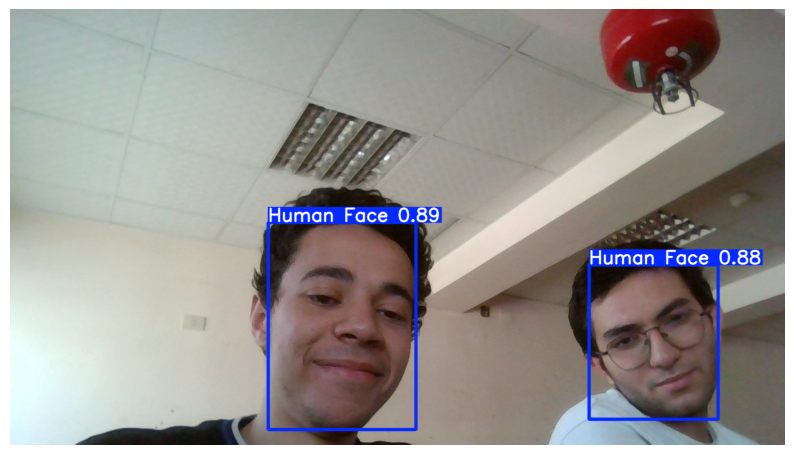

True

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model_path = r"E:\computer vision\Lab 3\Lab 3\my_model.tflite" 
image_path = r"C:\Users\mmwmn\Pictures\Camera Roll\WIN_20250428_15_08_10_Pro.jpg" 

my_model = YOLO(model_path)

frame = cv2.imread(image_path)

results = my_model(frame, conf=0.5)
result = results[0]
boxes = result.boxes 
annotated_frame = result.plot() 

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.imwrite("result.jpg", annotated_frame)

In [1]:
import cv2
from ultralytics import YOLO

model_path = r"E:\computer vision\Lab 3\Lab 3\my_model.tflite"
my_model = YOLO(model_path)
print(" Model loaded ")

cap = cv2.VideoCapture(0)
i = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = my_model(img, conf=0.5)
    result = results[0]
    annotated_frame = result.plot()

    print(f"Frame {i}: Total boxes = {len(result.boxes)}")

    cv2.imshow("video", cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))

    key = cv2.waitKey(20) & 0xFF
    if key == ord('q'):
        break

    i += 1

cap.release()
cv2.destroyAllWindows()


WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
 Model loaded 
Loading E:\computer vision\Lab 3\Lab 3\my_model.tflite for TensorFlow Lite inference...



c:\Users\mmwmn\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


0: 640x640 1 Human Face, 139.6ms
Speed: 27.3ms preprocess, 139.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Frame 0: Total boxes = 1

0: 640x640 1 Human Face, 149.6ms
Speed: 3.8ms preprocess, 149.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Frame 1: Total boxes = 1

0: 640x640 1 Human Face, 153.3ms
Speed: 3.3ms preprocess, 153.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Frame 2: Total boxes = 1

0: 640x640 1 Human Face, 143.1ms
Speed: 6.5ms preprocess, 143.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Frame 3: Total boxes = 1

0: 640x640 1 Human Face, 146.5ms
Speed: 3.6ms preprocess, 146.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Frame 4: Total boxes = 1

0: 640x640 1 Human Face, 145.5ms
Speed: 5.4ms preprocess, 145.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Frame 5: Total boxes = 1

0: 640x640 1 Human Face, 144.8ms
Speed: 5.4ms preprocess,